<a href="https://colab.research.google.com/github/Swaralifendar/Netflix-genre-analysis/blob/main/Netflix_Genre_%26_Duration_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Upload the ZIP file manually in Colab
from zipfile import ZipFile

# 2. Unzip the file
with ZipFile('/content/Dataset_movies.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# 3. Check extracted files
import os
os.listdir('/content/')

['.config', 'Dataset_movies.zip', 'disney_plus_titles.csv', 'sample_data']

In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/disney_plus_titles.csv')

# Display first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
# Check info
df.info()

# Check missing values
df.isnull().sum()

# Drop rows with missing rating or duration if needed
df.dropna(subset=['rating', 'duration'], inplace=True)

# For genre: 'listed_in' is the genre column
df['genre'] = df['listed_in'].str.split(',').str[0]

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year
df['year_added'] = df['date_added'].dt.year


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


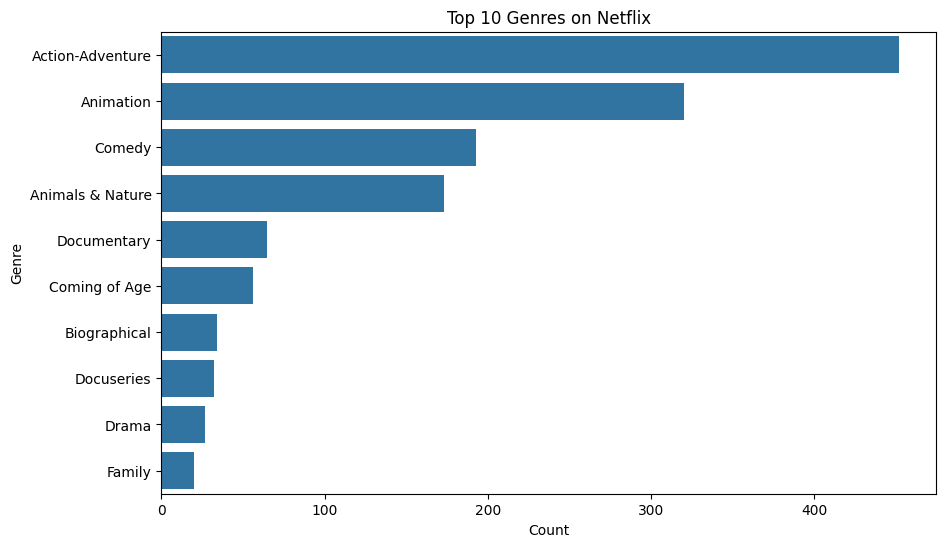

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(y=df['genre'], order=df['genre'].value_counts().index[:10])
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

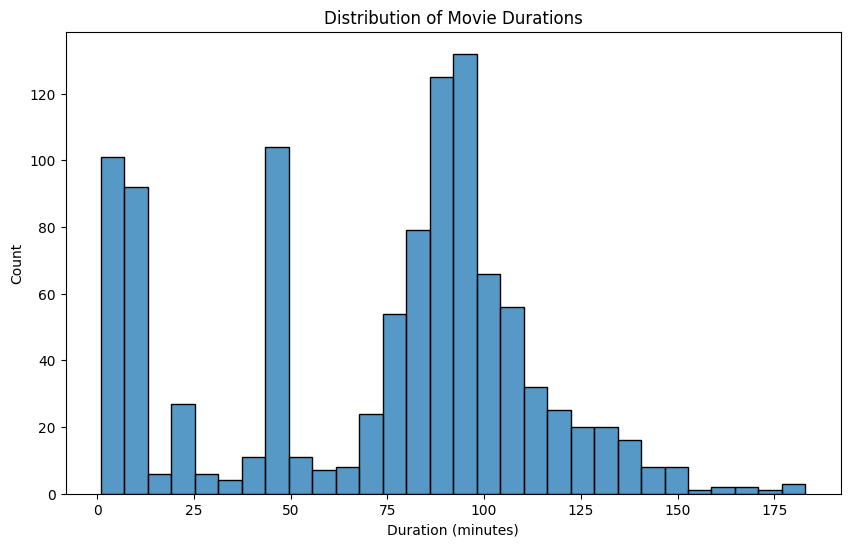

In [6]:
# Convert duration (like '90 min') to int
df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)

# Filter movies only
movies = df[df['type'] == 'Movie']

# Plot duration vs rating
plt.figure(figsize=(10,6))
sns.histplot(data=movies, x='duration_mins', bins=30)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


In [7]:
# Most frequent titles
df['title'].value_counts().head(10)

,count
title,
Captain Sparky vs. The Flying Saucers,1
Duck the Halls: A Mickey Mouse Christmas Special,1
Ernest Saves Christmas,1
Ice Age: A Mammoth Christmas,1
The Queen Family Singalong,1
Becoming Cousteau,1
Hawkeye,1
Lady and the Tramp II: Scamp's Adventure,1
Justin Morgan had a Horse,1


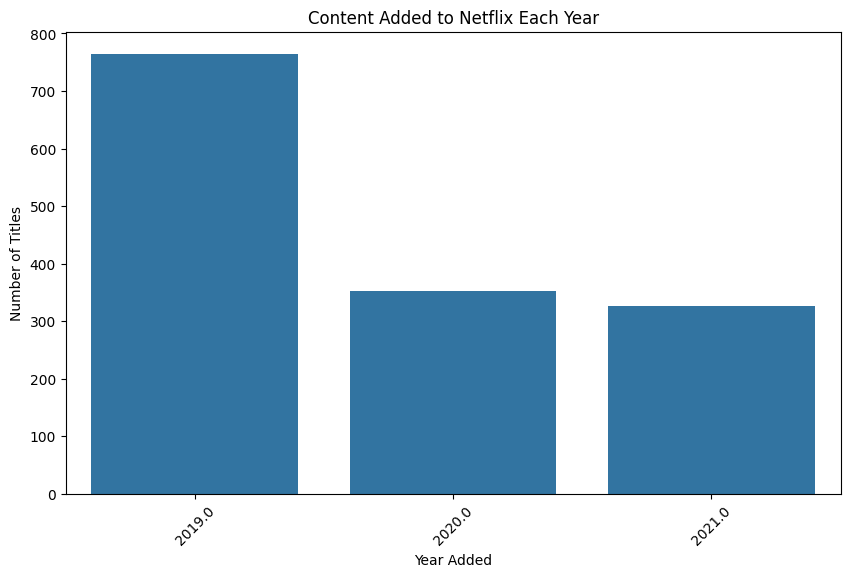

In [8]:
# Number of Shows Added Per Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Summary of Key Insights
print("Top 5 Most Common Genres:")
print(df['genre'].value_counts().head())

print("\nAverage Movie Duration:", movies['duration_mins'].mean(), "minutes")


Top 5 Most Common Genres:
genre
Action-Adventure    452
Animation           320
Comedy              193
Animals & Nature    173
Documentary          65
Name: count, dtype: int64

Average Movie Duration: 71.92863939105614 minutes
